In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from PIL import Image

In [85]:
with open("data/caltech_images_20190919.json", 'r') as f:
    annotations = json.load(f)

### What's in the json file

In [3]:
annotations['info']

{'year': 2018,
 'contributor': 'Sara Beery',
 'date_created': '2018-07-03 18:34:36.573636',
 'version': 'Caltech Camera Traps',
 'description': 'Database of camera trap images collected from the NPS and the USGS with help from Justin Brown and Erin Boydston'}

In [4]:
annotations['categories']

[{'name': 'bobcat', 'id': 6},
 {'name': 'opossum', 'id': 1},
 {'name': 'empty', 'id': 30},
 {'name': 'coyote', 'id': 9},
 {'name': 'raccoon', 'id': 3},
 {'name': 'bird', 'id': 11},
 {'name': 'dog', 'id': 8},
 {'name': 'cat', 'id': 16},
 {'name': 'squirrel', 'id': 5},
 {'name': 'rabbit', 'id': 10},
 {'name': 'skunk', 'id': 7},
 {'name': 'lizard', 'id': 14},
 {'name': 'rodent', 'id': 99},
 {'name': 'badger', 'id': 21},
 {'name': 'deer', 'id': 34},
 {'name': 'cow', 'id': 37},
 {'name': 'car', 'id': 33},
 {'name': 'fox', 'id': 51},
 {'name': 'pig', 'id': 39},
 {'name': 'mountain_lion', 'id': 40},
 {'name': 'bat', 'id': 66},
 {'name': 'insect', 'id': 97}]

In [5]:
annotations['images'][0]

{'seq_num_frames': 1,
 'date_captured': '2013-10-04 13:31:53',
 'seq_id': '6f2160eb-5567-11e8-990e-dca9047ef277',
 'height': 1494,
 'width': 2048,
 'location': 26,
 'rights_holder': 'Erin Boydston',
 'file_name': 'train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg',
 'id': '5968c0f9-23d2-11e8-a6a3-ec086b02610b',
 'frame_num': 1}

In [6]:
annotations['annotations'][0]

{'id': '207268a3-7d5b-11e7-884d-7845c41c2c67',
 'category_id': 6,
 'image_id': '58d61304-23d2-11e8-a6a3-ec086b02610b'}

In [7]:
print(len(annotations['images']))
print(len(annotations['annotations']))
print(len(annotations['categories']))

243100
245118
22


In [8]:
!ls data/cct_images/ -1 | wc -l

244584


### Get annotation and image dataframe from json

In [86]:
annot_df = pd.DataFrame.from_dict(annotations['annotations'])

In [87]:
annot_df.head()

,id,category_id,image_id
0,207268a3-7d5b-11e7-884d-7845c41c2c67,6,58d61304-23d2-11e8-a6a3-ec086b02610b
1,207268a4-7d5b-11e7-884d-7845c41c2c67,1,58e59acd-23d2-11e8-a6a3-ec086b02610b
2,207268a5-7d5b-11e7-884d-7845c41c2c67,30,58a6e5f1-23d2-11e8-a6a3-ec086b02610b
3,207268a6-7d5b-11e7-884d-7845c41c2c67,9,58ff0cef-23d2-11e8-a6a3-ec086b02610b
4,207268a7-7d5b-11e7-884d-7845c41c2c67,3,588f67b8-23d2-11e8-a6a3-ec086b02610b


In [88]:
image_df = pd.DataFrame.from_dict(annotations['images'])

In [89]:
image_df.head(10)

,seq_num_frames,date_captured,seq_id,height,width,location,rights_holder,file_name,id,frame_num
0,1,2013-10-04 13:31:53,6f2160eb-5567-11e8-990e-dca9047ef277,1494,2048,26,Erin Boydston,train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b...,5968c0f9-23d2-11e8-a6a3-ec086b02610b,1
1,1,2013-11-04 18:37:07,6f27ed66-5567-11e8-9e92-dca9047ef277,1494,2048,26,Erin Boydston,train_val/5a0b016f-23d2-11e8-a6a3-ec086b02610b...,5a0b016f-23d2-11e8-a6a3-ec086b02610b,1
2,3,2012-05-09 07:33:45,6f04895c-5567-11e8-a3d6-dca9047ef277,1494,2048,38,Justin Brown,train_val/59b93afb-23d2-11e8-a6a3-ec086b02610b...,59b93afb-23d2-11e8-a6a3-ec086b02610b,2
3,3,2012-03-29 02:34:13,6f0385b5-5567-11e8-a80b-dca9047ef277,1494,2048,38,Justin Brown,train_val/59641f56-23d2-11e8-a6a3-ec086b02610b...,59641f56-23d2-11e8-a6a3-ec086b02610b,2
4,3,2012-05-08 19:23:36,6f0a3ccf-5567-11e8-92fb-dca9047ef277,1494,2048,33,Justin Brown,train_val/5a1e5306-23d2-11e8-a6a3-ec086b02610b...,5a1e5306-23d2-11e8-a6a3-ec086b02610b,2
5,1,2012-01-06 10:57:00,70096335-5567-11e8-a99a-dca9047ef277,1536,2048,36,Erin Boydston,train_val/5a096955-23d2-11e8-a6a3-ec086b02610b...,5a096955-23d2-11e8-a6a3-ec086b02610b,1
6,3,2014-06-27 08:29:02,7013c982-5567-11e8-be89-dca9047ef277,1494,2048,61,Justin Brown,train_val/59b93a3b-23d2-11e8-a6a3-ec086b02610b...,59b93a3b-23d2-11e8-a6a3-ec086b02610b,2
7,3,2012-09-29 18:14:45,70115511-5567-11e8-a1fd-dca9047ef277,1494,2048,41,Justin Brown,train_val/5a217843-23d2-11e8-a6a3-ec086b02610b...,5a217843-23d2-11e8-a6a3-ec086b02610b,1
8,3,2011-11-29 17:28:26,6f011019-5567-11e8-a650-dca9047ef277,1494,2048,38,Justin Brown,train_val/5a2176e7-23d2-11e8-a6a3-ec086b02610b...,5a2176e7-23d2-11e8-a6a3-ec086b02610b,2
9,1,2014-04-22 15:17:36,6f34ad07-5567-11e8-9e2b-dca9047ef277,1494,2048,26,Erin Boydston,train_val/59cb3a1e-23d2-11e8-a6a3-ec086b02610b...,59cb3a1e-23d2-11e8-a6a3-ec086b02610b,1


In [13]:
image_df.shape

(243100, 10)

In [14]:
annot_df.shape

(245118, 3)

### Why are there duplicate annotations?

In [15]:
# 243100 unique annotations - same as the images
annot_df['image_id'].nunique()

243100

In [16]:
dup_list = annot_df[annot_df['image_id'].duplicated()]['image_id']

In [17]:
annot_df[annot_df['image_id'].isin(dup_list)].sort_values(by=['image_id'])

# sometimes the duplicate annotations have the same category, sometimes not
# need to look at a few images..

,id,category_id,image_id
34276,26086,3,5858c0ac-23d2-11e8-a6a3-ec086b02610b
34275,26085,3,5858c0ac-23d2-11e8-a6a3-ec086b02610b
42849,db10e7e8-05ea-11e8-b642-dca9047ef277,6,5858c105-23d2-11e8-a6a3-ec086b02610b
42850,29cec31f-a2c8-4992-b362-9eece84c9555,10,5858c105-23d2-11e8-a6a3-ec086b02610b
60186,26253,8,5858c117-23d2-11e8-a6a3-ec086b02610b
...,...,...,...
36589,16808,6,5a2c8779-23d2-11e8-a6a3-ec086b02610b
15209,20211,9,5a2e1243-23d2-11e8-a6a3-ec086b02610b
15208,20210,9,5a2e1243-23d2-11e8-a6a3-ec086b02610b
22493,3740,6,5a2e1388-23d2-11e8-a6a3-ec086b02610b


### Map animal name

In [90]:
category_id = []
category_name = []

for i in annotations['categories']:
    category_id.append(i['id'])
    category_name.append(i['name'])
    
category_dict = dict(zip(category_id, category_name))
category_dict

{6: 'bobcat',
 1: 'opossum',
 30: 'empty',
 9: 'coyote',
 3: 'raccoon',
 11: 'bird',
 8: 'dog',
 16: 'cat',
 5: 'squirrel',
 10: 'rabbit',
 7: 'skunk',
 14: 'lizard',
 99: 'rodent',
 21: 'badger',
 34: 'deer',
 37: 'cow',
 33: 'car',
 51: 'fox',
 39: 'pig',
 40: 'mountain_lion',
 66: 'bat',
 97: 'insect'}

In [91]:
annot_df['category_name'] = annot_df['category_id'].map(category_dict)

In [92]:
annot_df.head()

,id,category_id,image_id,category_name
0,207268a3-7d5b-11e7-884d-7845c41c2c67,6,58d61304-23d2-11e8-a6a3-ec086b02610b,bobcat
1,207268a4-7d5b-11e7-884d-7845c41c2c67,1,58e59acd-23d2-11e8-a6a3-ec086b02610b,opossum
2,207268a5-7d5b-11e7-884d-7845c41c2c67,30,58a6e5f1-23d2-11e8-a6a3-ec086b02610b,empty
3,207268a6-7d5b-11e7-884d-7845c41c2c67,9,58ff0cef-23d2-11e8-a6a3-ec086b02610b,coyote
4,207268a7-7d5b-11e7-884d-7845c41c2c67,3,588f67b8-23d2-11e8-a6a3-ec086b02610b,raccoon


### Merge category data to image data

In [93]:
# drop duplicate annotations
annot_df.sort_values("image_id", inplace = True) 
  
# dropping duplicte values 
annot_df_nodup = annot_df.drop_duplicates(subset ="image_id", keep = 'first') 

In [94]:
annot_df_nodup.shape

(243100, 4)

In [97]:
# merge annotation and image data together
image_df.rename(columns={"id": "image_id"}, inplace=True)
image_df.sort_values("image_id", inplace = True) 
image_df_annot = pd.concat([image_df.set_index('image_id'), annot_df_nodup.set_index('image_id')], axis=1, join='inner').reset_index()

In [98]:
image_df_annot.shape

(243100, 13)

In [101]:
image_df_annot.head()

,image_id,seq_num_frames,date_captured,seq_id,height,width,location,rights_holder,file_name,frame_num,id,category_id,category_name
0,5858bf1e-23d2-11e8-a6a3-ec086b02610b,1,2014-07-10 14:20:20,6fc5ac4a-5567-11e8-b3db-dca9047ef277,1494,2048,96,Erin Boydston,test/5858bf1e-23d2-11e8-a6a3-ec086b02610b.jpg,1,52acca15-7d6d-11e7-884d-7845c41c2c67,30,empty
1,5858bf20-23d2-11e8-a6a3-ec086b02610b,1,2014-05-26 13:44:00,6fbb3c73-5567-11e8-b378-dca9047ef277,1494,2048,96,Erin Boydston,test/5858bf20-23d2-11e8-a6a3-ec086b02610b.jpg,1,f77c64a8-7d6e-11e7-884d-7845c41c2c67,30,empty
2,5858bf21-23d2-11e8-a6a3-ec086b02610b,1,2014-09-16 08:16:51,7006f717-5567-11e8-b4c6-dca9047ef277,1494,2048,114,Erin Boydston,test/5858bf21-23d2-11e8-a6a3-ec086b02610b.jpg,1,1aa83e59-7d71-11e7-884d-7845c41c2c67,10,rabbit
3,5858bf22-23d2-11e8-a6a3-ec086b02610b,1,2014-05-27 14:57:44,6fbd60e3-5567-11e8-a122-dca9047ef277,1494,2048,96,Erin Boydston,test/5858bf22-23d2-11e8-a6a3-ec086b02610b.jpg,1,45913ae8-7d6d-11e7-884d-7845c41c2c67,30,empty
4,5858bf23-23d2-11e8-a6a3-ec086b02610b,1,2014-06-06 12:31:06,6fbf5a47-5567-11e8-9655-dca9047ef277,1494,2048,96,Erin Boydston,test/5858bf23-23d2-11e8-a6a3-ec086b02610b.jpg,1,5f7e6e7a-7d6e-11e7-884d-7845c41c2c67,30,empty


### Look at some distribution

In [104]:
image_df_annot.groupby('category_name').image_id.count().sort_values()

category_name
pig                   2
bat                   3
insect                6
badger               43
mountain_lion       145
lizard              309
skunk              1892
fox                2574
cow                3626
dog                4195
rodent             4272
squirrel           4432
car                4717
cat                5167
bobcat             7952
bird               9521
raccoon           10981
deer              12191
rabbit            12345
coyote            16348
opossum           16634
empty            125745
Name: image_id, dtype: int64

In [105]:
image_df_annot.groupby('location').image_id.count().sort_values()

location
113        1
139        4
119        8
47         8
15         9
       ...  
57     12805
114    13157
76     13979
26     28670
96     37766
Name: image_id, Length: 140, dtype: int64

### Look at some images

In [112]:
def load_image(path, size=None):
    """
    Load the image from the given file-path and resize it
    to the given size if not None.
    """

    # Load the image using PIL.
    img = Image.open(path)

    # Resize image if desired.
    if not size is None:
        img = img.resize(size=size, resample=Image.LANCZOS)

    # Convert image to numpy array.
    img = np.array(img)

    # Scale image-pixels so they fall between 0.0 and 1.0
    img = img / 255.0

    # Convert 2-dim gray-scale array to 3-dim RGB array.
    if (len(img.shape) == 2):
        img = np.repeat(img[:, :, np.newaxis], 3, axis=2)

    return img

In [113]:
def show_image(path, category):
    """
    Load and plot an image from the training- or validation-set
    with the given index.
    """

    #path = filenames_train[idx]
    #caption = captions_train[idx]

    # Print the captions for this image.
    print("Category: " + category)
    
    # Load the image and plot it.
    img = load_image(path)
    plt.imshow(img)
    plt.show()

In [115]:
# get image vector
img_path_vector = list('data/cct_images/' + image_df_annot['image_id'] + '.jpg')

In [110]:
# get category vector
cat_name_vector = list(image_df_annot['category_name'])
cat_id_vector = list(image_df_annot['category_id'])

In [116]:
print(img_path_vector[:5])
print(cat_name_vector[:5])
print(cat_id_vector[:5])

['data/cct_images/5858bf1e-23d2-11e8-a6a3-ec086b02610b.jpg', 'data/cct_images/5858bf20-23d2-11e8-a6a3-ec086b02610b.jpg', 'data/cct_images/5858bf21-23d2-11e8-a6a3-ec086b02610b.jpg', 'data/cct_images/5858bf22-23d2-11e8-a6a3-ec086b02610b.jpg', 'data/cct_images/5858bf23-23d2-11e8-a6a3-ec086b02610b.jpg']
['empty', 'empty', 'rabbit', 'empty', 'empty']
[30, 30, 10, 30, 30]


Category: bird


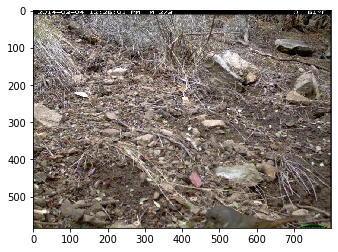

In [140]:
id = 1021
show_image(img_path_vector[id], cat_name_vector[id])